In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
# My libraries:
import dataset.dataset as dtset
from dbclass.dbclass import DBCLASS
from dbclass import dbclass_utils as db_utils


In [3]:
# import some data to play with
ds = load_digits()
ds

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
# Splitting the data for trainning and for test:
ds_train, ds_test = dtset.split_data(ds, prop_train=0.8)

In [5]:
# Compute a PCA on the face dataset (treated as unlabeled dataset):
# unsupervised feature extraction / dimensionality reduction
n_components = 10
pca = PCA(n_components=n_components, svd_solver='full',
            whiten=True).fit(ds_train['data'])
# Projecting the input data on the eigenfaces orthonormal basis:
ds_train['data'] = pca.transform(ds_train['data'])
ds_test['data'] = pca.transform(ds_test['data'])
ds['data'] = pca.transform(ds['data'])


Probability score threshold: 0.0
confidence: 0.707965
[[7.42 0.55 0.   0.   0.27 0.   0.27 1.1  0.   0.27 0.  ]
 [0.   7.14 0.82 0.   0.   0.27 0.   0.   0.55 1.37 0.  ]
 [0.   0.   8.24 0.27 0.   0.27 0.   0.   0.82 0.27 0.  ]
 [0.   1.37 0.82 5.49 0.   0.82 0.   0.27 1.1  0.27 0.  ]
 [0.   0.   0.   0.   9.34 0.55 0.   0.27 0.   0.   0.  ]
 [0.   1.65 0.   0.   0.27 5.49 0.   1.37 0.55 0.82 0.  ]
 [0.   1.37 0.27 0.27 0.27 0.   7.69 0.   0.27 0.   0.  ]
 [0.   0.27 0.   0.   0.27 0.27 0.   8.52 0.55 0.   0.  ]
 [0.   2.2  0.   0.   0.55 0.   0.   0.55 5.77 0.55 0.  ]
 [0.27 1.65 0.   0.55 0.82 0.27 0.   0.82 0.   5.49 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]

Probability score threshold: 0.1
confidence: 0.707965
[[7.42 0.55 0.   0.   0.27 0.   0.27 1.1  0.   0.27 0.  ]
 [0.   7.14 0.82 0.   0.   0.27 0.   0.   0.55 1.37 0.  ]
 [0.   0.   8.24 0.27 0.   0.27 0.   0.   0.82 0.27 0.  ]
 [0.   1.37 0.82 5.49 0.   0.82 0.   0.27 1.1  0.27 0.  ]
 [0.   0.   0.   0.

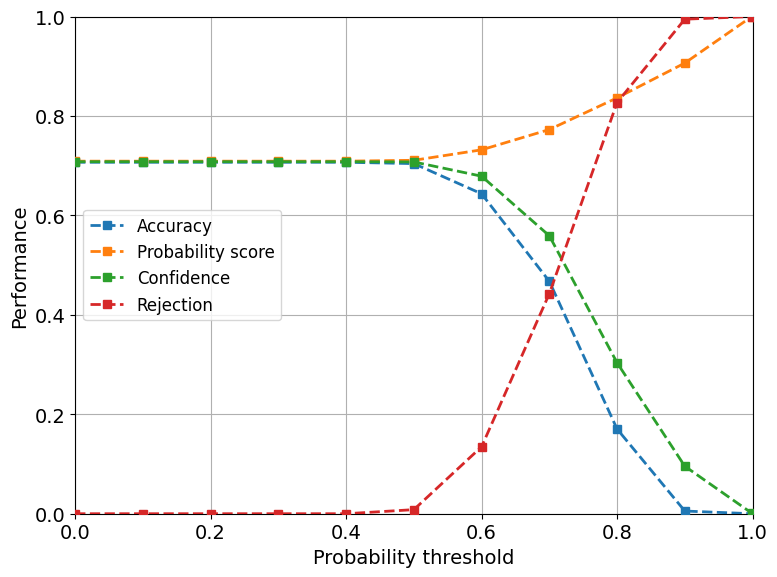


Best probability threshold value: 0.0
accuracy 0.70689
prob_score 0.70904
rejection 0
confidence 0.707965


In [6]:
# Trainning the model using cross validation in the trainning dataset:
dbclass = DBCLASS()
best_prob_thold, class_metrics = db_utils.cross_validation_trainning(dbclass, ds_train, ds_test)
print("\nBest probability threshold value:", best_prob_thold)
for metric in class_metrics.keys():
    print(metric, class_metrics[metric])

              precision    recall  f1-score   support

           0       1.00      0.79      0.88       178
           1       0.50      0.83      0.63       182
           2       0.83      0.79      0.81       177
           3       0.83      0.76      0.79       183
           4       0.89      0.81      0.85       181
           5       0.84      0.70      0.76       182
           6       0.98      0.83      0.90       181
           7       0.78      0.88      0.83       179
           8       0.72      0.67      0.69       174
           9       0.72      0.77      0.74       180

    accuracy                           0.78      1797
   macro avg       0.81      0.78      0.79      1797
weighted avg       0.81      0.78      0.79      1797


Confusion matrix:
[[7.79 0.45 0.06 0.   0.28 0.11 0.11 0.89 0.11 0.11 0.  ]
 [0.   8.4  0.83 0.   0.   0.17 0.   0.06 0.33 0.33 0.  ]
 [0.   0.61 7.74 0.22 0.   0.17 0.   0.06 0.67 0.39 0.  ]
 [0.   0.39 0.39 7.74 0.11 0.28 0.   0.11 0.33 0

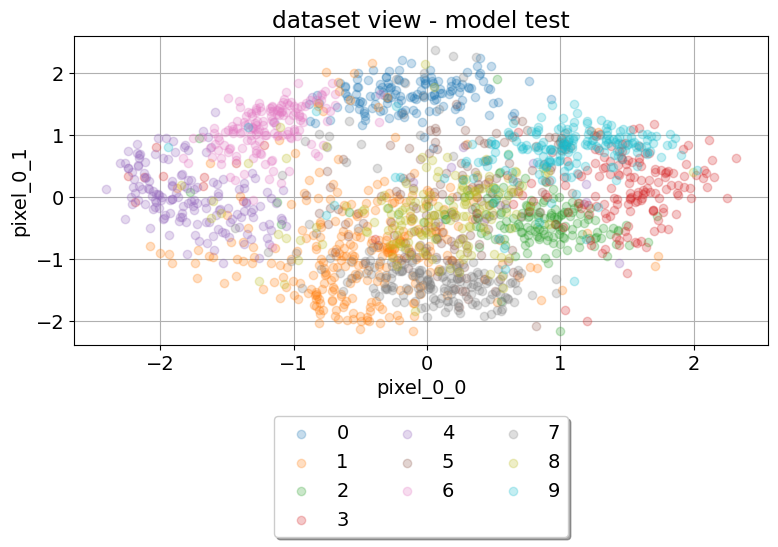

In [7]:
# Once the best probability score threshold is found, the classifier is
# configured with the best settings:
dbclass = DBCLASS(prob_thold=best_prob_thold)
dbclass.fit(ds['data'], ds['target'])
db_utils.dbclass_model_test(dbclass, ds)
